# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [2]:
# Loading fake and real news data from two different files
fake_news = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")
real_news = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")

# Setting Label for Fake and Real Newa


In [3]:
# Considering 0 for fake news and 1 for real news
fake_news["label"] = 0
real_news["label"] = 1

# Checking Data Distribution

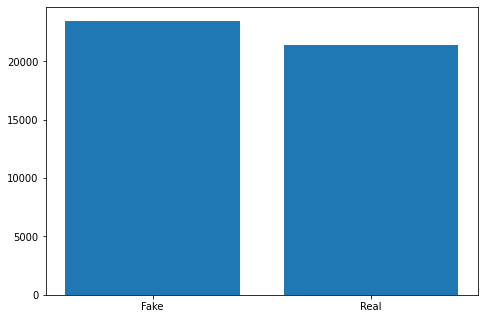

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cats = ['Fake', 'Real']
samples = [fake_news.shape[0],real_news.shape[0]]
ax.bar(cats,samples)
plt.show()

# Data Exploration (Fake News)

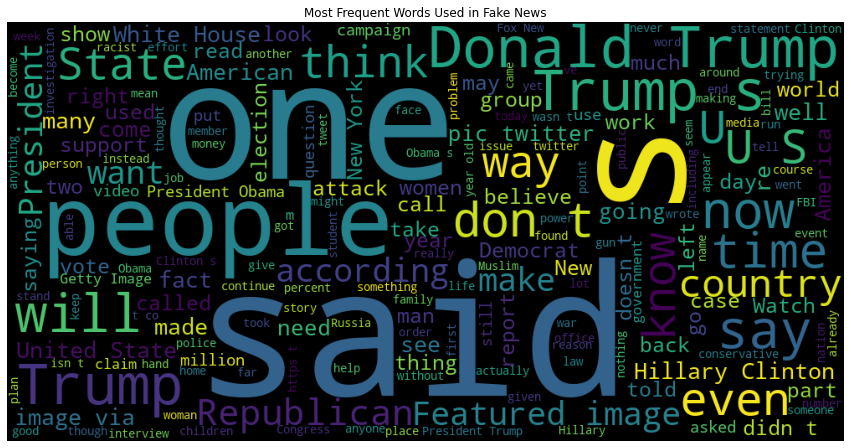

In [5]:
fake_news_words = pd.Series(' '.join(fake_news['text']).split())

wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(fake_news_words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Frequent Words Used in Fake News")
plt.axis("off")
plt.show()

# Data Exploration (Real News)

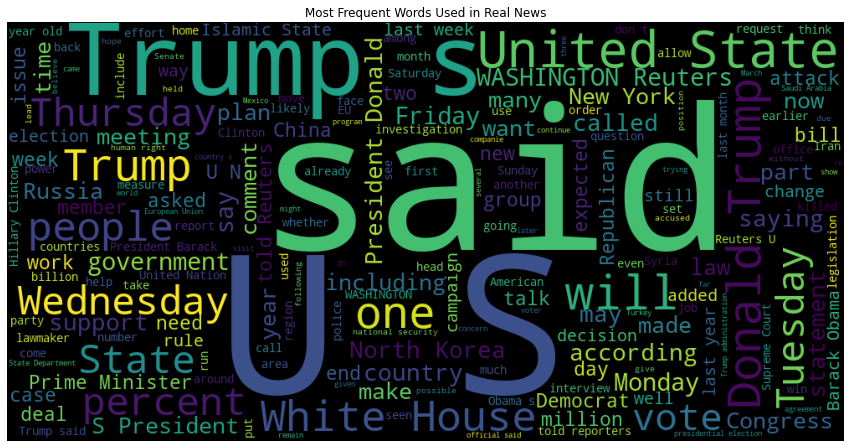

In [6]:
real_news_words = pd.Series(' '.join(real_news['text']).split())

wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(real_news_words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Frequent Words Used in Real News")
plt.axis("off")
plt.show()

# Combining Two different CSV Files

In [7]:
# Combining fake and real data together as they are in seperate file
data = pd.concat([fake_news,real_news], axis=0,ignore_index = True)

# Shuffling The Dataset after combining fake and real news
data = shuffle(data)

# Data Exploration (Links & Tags)

In [8]:
all_text_data = np.array(data['text'])

all_urls = []
for i in tqdm(range(0,data.shape[0])):
    r = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    urls = r.findall(all_text_data[i])
    all_urls = all_urls + urls

print('Total URLS: ', len(all_urls),'\n\n')
    

all_tags = []
for i in tqdm(range(0,data.shape[0])):
    r = re.compile('<.*?>')
    tags = r.findall(all_text_data[i])
    all_tags = all_tags + tags
    
print('Total Tags: ', len(all_tags))

 51%|█████     | 22769/44898 [00:00<00:00, 227670.13it/s]

Total URLS:  4672 




100%|██████████| 44898/44898 [00:00<00:00, 221986.30it/s]

Total Tags:  246


# Checking Null or Missing Values

In [9]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

# Dropping unnecessary columns

In [10]:
# Dropping unnecessary columns from dataset
data.drop(["title","subject","date"], axis=1, inplace=True)

# Creating Dependent and Independent variables

In [11]:
X = np.array(data['text'])
y = np.array(data["label"])

# Helper Functions for Data Preprocessing

In [12]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup
# 
def remove_tags(html):
    # parse html content
    soup = BeautifulSoup(html, "html.parser")
  
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

def remove_link_from(text):
    URLless_string = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}     /)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', text)
    return URLless_string

     |████████████████████████████████| 115 kB 283 kB/s 


# Data Preprocessing

In [13]:
ps = PorterStemmer()
corpus=[]

for i in tqdm(range(0,len(X))):
    #Data Cleaning only considerin the alphabets
    review = re.sub("[^a-zA-Z]"," ",X[i])
    
    #Lowering the cases
    review = review.lower()
    
    #Removing Links from texts
    review = remove_link_from(review)
    
    #Removing tags from texts
    review = remove_tags(review)
    
    #Splitting sentence into words
    review = review.split()
    
    #Stemming
    #Stropwords removing
    review = [ps.stem(word) for word in review if word not in stopwords.words("english")]
    
    #Joining the words again
    review = ' '.join(review)
    corpus.append(review)
    
X = corpus

100%|██████████| 44898/44898 [46:46<00:00, 16.00it/s]


# Saving Preprocessed Data

In [14]:
processed_data = {"text": X, "label": y}
processed_df = pd.DataFrame(processed_data)
processed_df.to_csv('preprocessed-combined-dataset.csv', index=False)